In [1]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

np.random.seed(1)
tf.random.set_seed(2)

NGRAMS = 2
FEATURE_LEN = 128
EPOCHS = 15
SAMPLES = 50000

df = pd.read_csv('../train-test/data/phishtank_2017.csv.bz2')
df.dropna(subset=['domain'], inplace=True)
df

,ID,Phish URL,Submitted,Valid?,Online?,url,date,domain
0,4717300,http://g28.ycxafz.biz/added on Jan 1st 2017 6:...,by cleanmx,VALID PHISH,Offline,http://g28.ycxafz.biz/,2017-01-01 06:45:00,g28.ycxafz.biz
1,4717281,http://sistemas.miranda.gob.ve/1/Sign%20on/add...,by cleanmx,VALID PHISH,Offline,http://sistemas.miranda.gob.ve/1/Sign%20on/,2017-01-01 05:46:00,sistemas.miranda.gob.ve
2,4717246,http://sheehydaringproject.com/PDFILES/added o...,by cleanmx,VALID PHISH,Offline,http://sheehydaringproject.com/PDFILES/,2017-01-01 04:15:00,sheehydaringproject.com
3,4717232,http://monar-kielce.pl/templates/beez/gdoc/ind...,by cleanmx,VALID PHISH,Offline,http://monar-kielce.pl/templates/beez/gdoc/ind...,2017-01-01 03:15:00,monar-kielce.pl
4,4717222,http://www.w-reia.com/bremer/new.php?cmd=login...,by cleanmx,VALID PHISH,Offline,http://www.w-reia.com/bremer/new.php?cmd=login...,2017-01-01 02:46:00,www.w-reia.com
...,...,...,...,...,...,...,...,...
101315,5407512,http://posari.com/Goody/Yahoo/home/index.phpad...,by cleanmx,VALID PHISH,Offline,http://posari.com/Goody/Yahoo/home/index.php,2018-01-01 05:42:00,posari.com
101316,5407505,http://abrazzak.com/login.php?cmd=login_submit...,by cleanmx,VALID PHISH,ONLINE,http://abrazzak.com/login.php?cmd=login_submit...,2018-01-01 05:41:00,abrazzak.com
101317,5407493,http://khanqahzakariya.lk/wpadmin/ex2017/login...,by cleanmx,VALID PHISH,ONLINE,http://khanqahzakariya.lk/wpadmin/ex2017/login...,2018-01-01 05:41:00,khanqahzakariya.lk
101318,5407490,http://pegesunblocking.000webhostapp.com/bayar...,by cleanmx,VALID PHISH,Offline,http://pegesunblocking.000webhostapp.com/bayar...,2018-01-01 05:40:00,pegesunblocking.000webhostapp.com


In [2]:
sdf = df.drop_duplicates('domain')
sdf

,ID,Phish URL,Submitted,Valid?,Online?,url,date,domain
0,4717300,http://g28.ycxafz.biz/added on Jan 1st 2017 6:...,by cleanmx,VALID PHISH,Offline,http://g28.ycxafz.biz/,2017-01-01 06:45:00,g28.ycxafz.biz
1,4717281,http://sistemas.miranda.gob.ve/1/Sign%20on/add...,by cleanmx,VALID PHISH,Offline,http://sistemas.miranda.gob.ve/1/Sign%20on/,2017-01-01 05:46:00,sistemas.miranda.gob.ve
2,4717246,http://sheehydaringproject.com/PDFILES/added o...,by cleanmx,VALID PHISH,Offline,http://sheehydaringproject.com/PDFILES/,2017-01-01 04:15:00,sheehydaringproject.com
3,4717232,http://monar-kielce.pl/templates/beez/gdoc/ind...,by cleanmx,VALID PHISH,Offline,http://monar-kielce.pl/templates/beez/gdoc/ind...,2017-01-01 03:15:00,monar-kielce.pl
4,4717222,http://www.w-reia.com/bremer/new.php?cmd=login...,by cleanmx,VALID PHISH,Offline,http://www.w-reia.com/bremer/new.php?cmd=login...,2017-01-01 02:46:00,www.w-reia.com
...,...,...,...,...,...,...,...,...
101289,5407454,http://online-banking.mobile.go.mambanetworkso...,by cleanmx,VALID PHISH,Offline,http://online-banking.mobile.go.mambanetworkso...,2018-01-01 04:41:00,online-banking.mobile.go.mambanetworksolutions...
101291,5407450,http://www.royalbankpacific.com/wp-admin/maint...,by cleanmx,VALID PHISH,Offline,http://www.royalbankpacific.com/wp-admin/maint...,2018-01-01 04:40:00,www.royalbankpacific.com
101293,5407446,http://healthyidealroutine.com/fl/87fb6e7a8551...,by cleanmx,VALID PHISH,Offline,http://healthyidealroutine.com/fl/87fb6e7a8551...,2018-01-01 04:40:00,healthyidealroutine.com
101300,5407544,http://camplakefire.com.au/include/chase-onlin...,by cleanmx,VALID PHISH,Offline,http://camplakefire.com.au/include/chase-onlin...,2018-01-01 07:10:00,camplakefire.com.au


In [3]:
try:
    sdf.groupby('target').agg({'domain': 'count'})
except:
    pass

In [4]:
adf = pd.read_csv('../train-test/data/top-1m.csv.zip', header=None)
adf.columns = ['rank', 'domain']
adf

,rank,domain
0,1,google.com
1,2,youtube.com
2,3,facebook.com
3,4,baidu.com
4,5,wikipedia.org
...,...,...
999995,999996,liberty-shopping.us
999996,999997,uazz.pl
999997,999998,waltonsun.com
999998,999999,aspvv.it


In [5]:
ldf = adf[['domain']].head(SAMPLES)
pdf = sdf[['domain']].sample(SAMPLES, random_state=21)

In [6]:
ldf['phishing'] = False
pdf['phishing'] = True
tdf = pd.concat([ldf, pdf])
tdf

,domain,phishing
0,google.com,False
1,youtube.com,False
2,facebook.com,False
3,baidu.com,False
4,wikipedia.org,False
...,...,...
25900,unlocklivevideofacebook.lifecares.info,True
28584,co.digital,True
86481,alexggilbert.com,True
13097,www.union.gr,True


## Preprocessing the input data

In [7]:
if True:
    # build n-gram list
    vect = CountVectorizer(analyzer='char', max_df=0.3, min_df=3, ngram_range=(NGRAMS, NGRAMS), lowercase=False) 
    #vect = CountVectorizer(analyzer='char', ngram_range=(NGRAMS, NGRAMS), lowercase=False) 
    a = vect.fit_transform(tdf.domain)
    vocab = vect.vocabulary_

    # sort n-gram by freq (highest -> lowest)
    words = []
    for b in vocab:
        c = vocab[b]
        #print(b, c, a[:, c].sum())
        words.append((a[:, c].sum(), b))
        #break
    words = sorted(words, reverse=True)
    words_list = [w[1] for w in words]
    num_words = len(words_list)
    print("num_words = %d" % num_words)


    def find_ngrams(text, n):
        a = zip(*[text[i:] for i in range(n)])
        wi = []
        for i in a:
            w = ''.join(i)
            try:
                idx = words_list.index(w)
            except:
                idx = 0
            wi.append(idx)
        return wi

    # build X from index of n-gram sequence
    X = np.array(tdf.domain.apply(lambda c: find_ngrams(c, NGRAMS)))
else:
    data = tdf.domain.str.cat()
    chars = list(set(data))
    data_size, vocab_size = len(data), len(chars)
    print('data has %d characters, %d unique.' % (data_size, vocab_size))
    char_to_ix = { ch:i for i,ch in enumerate(chars) }
    ix_to_char = { i:ch for i,ch in enumerate(chars) }
    num_words = vocab_size
    X = np.array(tdf.domain.apply(lambda c: [char_to_ix[a] for a in c]))
X

num_words = 1453


array([list([129, 105, 134, 311, 39, 8, 0, 0, 0]),
       list([288, 68, 141, 166, 213, 128, 8, 0, 0, 0]),
       list([188, 43, 66, 58, 161, 105, 218, 142, 0, 0, 0]), ...,
       list([16, 39, 219, 894, 471, 152, 77, 376, 128, 3, 76, 25, 0, 0, 0]),
       list([1, 1, 15, 146, 83, 102, 60, 9, 36, 154, 182]),
       list([65, 149, 290, 83, 367, 121, 13, 137, 133, 38, 157, 74, 0, 0, 28, 46, 103])],
      dtype=object)

In [8]:
# check max/avg feature
X_len = []
for x in X:
    X_len.append(len(x))

max_feature_len = max(X_len)
avg_feature_len = int(np.mean(X_len))

print("Max feature len = %d, Avg. feature len = %d" % (max_feature_len, avg_feature_len))

Max feature len = 62, Avg. feature len = 16


In [9]:
y = np.array(tdf.phishing.astype('category').cat.codes)

# Split train and test dataset
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## Train a LSTM model

In [10]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Activation
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import load_model

max_features = num_words # 20000
feature_len = FEATURE_LEN # avg_feature_len # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=feature_len)
X_test = sequence.pad_sequences(X_test, maxlen=feature_len)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

80000 train sequences
20000 test sequences
Pad sequences (samples x time)


Using TensorFlow backend.


X_train shape: (80000, 128)
X_test shape: (20000, 128)


In [11]:
print('Build model...')

model = Sequential()
model.add(Embedding(num_words, 32, input_length=feature_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 128, 32)           46496     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 129,057
Trainable params: 129,057
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, epochs=EPOCHS,
          validation_split=0.1, verbose=1)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size, verbose=1)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


/opt/venv37/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 8000 samples
Epoch 1/15
72000/72000 [==============================] - 315s 4ms/step - loss: 0.4050 - accuracy: 0.8081 - val_loss: 0.3640 - val_accuracy: 0.8349
Epoch 2/15
72000/72000 [==============================] - 313s 4ms/step - loss: 0.3730 - accuracy: 0.8251 - val_loss: 0.3595 - val_accuracy: 0.8342
Epoch 3/15
72000/72000 [==============================] - 312s 4ms/step - loss: 0.3626 - accuracy: 0.8313 - val_loss: 0.3579 - val_accuracy: 0.8328
Epoch 4/15
72000/72000 [==============================] - 344s 5ms/step - loss: 0.3550 - accuracy: 0.8345 - val_loss: 0.3465 - val_accuracy: 0.8379
Epoch 5/15
72000/72000 [==============================] - 441s 6ms/step - loss: 0.3479 - accuracy: 0.8379 - val_loss: 0.3496 - val_accuracy: 0.8389
Epoch 6/15
72000/72000 [==============================] - 442s 6ms/step - loss: 0.3423 - accuracy: 0.8403 - val_loss: 0.3417 - val_accuracy: 0.8421
Epoch 7/15
72000/72000 [==============================] - 386s 

## Confusion Matrix

In [13]:
y_pred = model.predict_classes(X_test, verbose=1)
y_probs = model.predict_proba(X_test, verbose=1) # to predict probability
target_names = list(tdf.phishing.astype('category').cat.categories)

20000/20000 [==============================] - 25s 1ms/step


In [14]:
target_names = [str(t) for t in target_names]
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))    

              precision    recall  f1-score   support

       False       0.80      0.89      0.84     10000
        True       0.88      0.78      0.83     10000

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.83     20000
weighted avg       0.84      0.84      0.83     20000

[[8907 1093]
 [2202 7798]]


In [15]:
y_train_pred = model.predict_classes(X_train, verbose=1)
y_train_probs = model.predict_proba(X_train, verbose=1) # to predict probability
target_names = list(tdf.phishing.astype('category').cat.categories)
target_names = [str(t) for t in target_names]
print(classification_report(y_train, y_train_pred, target_names=target_names))
print(confusion_matrix(y_train, y_train_pred))

80000/80000 [==============================] - 99s 1ms/step
              precision    recall  f1-score   support

       False       0.83      0.92      0.87     40000
        True       0.91      0.81      0.86     40000

    accuracy                           0.87     80000
   macro avg       0.87      0.87      0.87     80000
weighted avg       0.87      0.87      0.87     80000

[[36828  3172]
 [ 7426 32574]]


In [16]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score, log_loss)

In [17]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.isotonic import IsotonicRegression as IR
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score as AUC

In [18]:
lr = LR()                                                       # default param values
lr.fit( y_train_probs.reshape( -1, 1 ), y_train )               # LR needs X to be 2-dimensional
p_calibrated = lr.predict_proba( y_probs.reshape( -1, 1 ))[:,1]

In [19]:
###
acc = accuracy_score( y_test, np.round( y_probs ))
acc_calibrated = accuracy_score( y_test, np.round( p_calibrated ))

auc = AUC( y_test, y_probs )
auc_calibrated = AUC( y_test, p_calibrated )

ll = log_loss( y_test, y_probs[:,0] )
ll_calibrated = log_loss( y_test, p_calibrated )

print("accuracy - before/after:", acc, "/", acc_calibrated)
print("AUC - before/after:     ", auc, "/", auc_calibrated)
print("log loss - before/after:", ll, "/", ll_calibrated)

accuracy - before/after: 0.83525 / 0.83345
AUC - before/after:      0.912537185 / 0.912537185
log loss - before/after: 0.3637729271514883 / 0.38141145585901703


In [20]:
ir = IR( out_of_bounds = 'clip' )            # out_of_bounds param needs scikit-learn >= 0.15
ir.fit( y_train_probs[:,0], y_train )
p_calibrated_ir = ir.transform( y_probs[:, 0] )
p_calibrated_ir[np.isnan( p_calibrated_ir )] = 0

In [21]:
p_calibrated_ir = p_calibrated_ir.astype('float64')
p_calibrated_ir

array([1.        , 0.89750695, 0.04008909, ..., 0.99975014, 0.33519036,
       0.31288344])

In [22]:
acc = accuracy_score( y_test, np.round( y_probs ))
acc_calibrated = accuracy_score( y_test, np.round( p_calibrated_ir ))

auc = AUC( y_test, y_probs )
auc_calibrated = AUC( y_test, p_calibrated_ir )

ll = log_loss( y_test, y_probs[:,0] )
ll_calibrated = log_loss( y_test, p_calibrated_ir )

print("accuracy - before/after:", acc, "/", acc_calibrated)
print("AUC - before/after:     ", auc, "/", auc_calibrated)
print("log loss - before/after:", ll, "/", ll_calibrated)

accuracy - before/after: 0.83525 / 0.8339
AUC - before/after:      0.912537185 / 0.912349615
log loss - before/after: 0.3637729271514883 / 0.37101301696336025


phish_2017:
	Brier: 0.116
	Precision: 0.877
	Recall: 0.780
	F1: 0.826

phish_2017 + LR:
	Brier: 0.121
	Precision: 0.877
	Recall: 0.780
	F1: 0.826

phish_2017 + IR:
	Brier: 0.117
	Precision: 0.877
	Recall: 0.780
	F1: 0.826



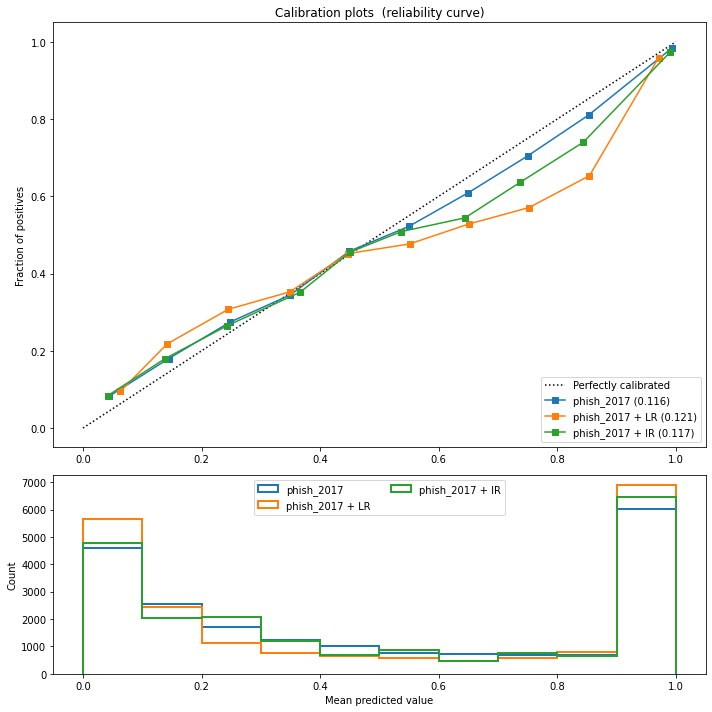

In [23]:
fig_index = 1

fig = plt.figure(fig_index, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for name, prob_pos, y_test2, y_pred2 in [#('phish_2017 (train)', y_train_probs, y_train, y_train_pred),
                                         ('phish_2017', y_probs, y_test, y_pred),
                                         ("phish_2017 + LR", p_calibrated, y_test, y_pred),
                                         ("phish_2017 + IR", p_calibrated_ir, y_test, y_pred)]:
    clf_score = brier_score_loss(y_test2, prob_pos, pos_label=y.max())
    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    print("\tPrecision: %1.3f" % precision_score(y_test2, y_pred2))
    print("\tRecall: %1.3f" % recall_score(y_test2, y_pred2))
    print("\tF1: %1.3f\n" % f1_score(y_test2, y_pred2))

    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test2, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s (%1.3f)" % (name, clf_score))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

## Save model